In [1]:
# Sentiment Classficiation on IMDB using Gated Recurrent Units (GRU)
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, GRU
import matplotlib.pyplot as plt

In [6]:
# max number of words + set sequence length
max_features = 10000
maxlen = 500

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=max_features)
print('Num Train Sequences',len(X_train))
print('Num Test Sequences',len(X_test))

Num Train Sequences 25000
Num Test Sequences 25000


In [8]:
# If sequences < 500, pad them out to have length of 500
X_train = sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = sequence.pad_sequences(X_test,maxlen=maxlen)

print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


In [11]:
# RNN with GRU unit
model = Sequential()
# Set input vectors to fixed size (take 10k as input,next GRU layer expects 32 inputs)
model.add(Embedding(max_features,32))
# GRU and Dense layer
model.add(GRU(32))
# 1 value = probabity of the review being 1
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile model and Track Accuracy
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 94ms/step - loss: 0.5483 - accuracy: 0.7228 - val_loss: 0.3679 - val_accuracy: 0.8406
Epoch 2/10
157/157 [==============================] - 14s 92ms/step - loss: 0.3189 - accuracy: 0.8677 - val_loss: 0.3602 - val_accuracy: 0.8404
Epoch 3/10
157/157 [==============================] - 14s 92ms/step - loss: 0.2577 - accuracy: 0.8970 - val_loss: 0.3578 - val_accuracy: 0.8540
Epoch 4/10
157/157 [==============================] - 14s 92ms/step - loss: 0.2228 - accuracy: 0.9135 - val_loss: 0.3035 - val_accuracy: 0.8790
Epoch 5/10
157/157 [==============================] - 14s 92ms/step - loss: 0.1933 - accuracy: 0.9279 - val_loss: 0.3110 - val_accuracy: 0.8774
Epoch 6/10
157/157 [==============================] - 14s 91ms/step - loss: 0.1716 - accuracy: 0.9374 - val_loss: 0.3324 - val_accuracy: 0.8584
Epoch 7/10
157/157 [==============================] - 14s 91ms/step - loss: 0.1514 - accuracy: 0.9457 - val_loss: 0.3347 - val_accuracy:

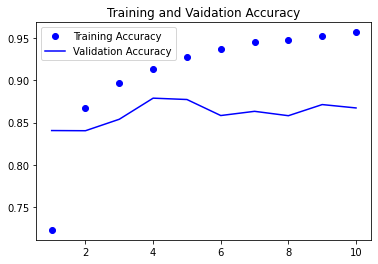

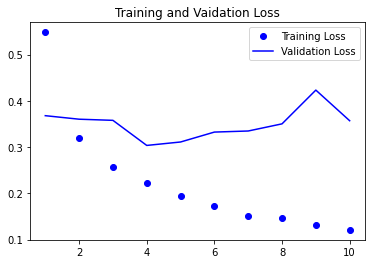

In [14]:
def plot_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1,len(acc)+1)
  plt.plot(epochs,acc,'bo',label='Training Accuracy')
  plt.plot(epochs,val_acc,'b',label='Validation Accuracy')

  plt.title('Training and Vaidation Accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs,loss,'bo',label='Training Loss')
  plt.plot(epochs,val_loss,'b',label='Validation Loss')
  plt.title('Training and Vaidation Loss')
  plt.legend()
  plt.show()

plot_results(history)